# Multivariate Analysis
-  More than > 2 variable


- **Pair plots** among `mpg`, `weight`, `horsepower`, `displacement`, `acceleration`.
- **Groupby analysis**:

  * Mean mpg by `origin` and `cylinders`.
  * Mean mpg trend over years.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We load the pickle file so we have the correct data type

# df = pd.read_pickle('data_MPG_clean.pkl')

# or use csv file
df = pd.read_csv('data_MPG.csv')

In [3]:
# print 10 sample values

print(df.sample(10))

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
128  15.0          6         250.0       100.0    3336          17.0   
14   24.0          4         113.0        95.0    2372          15.0   
62   13.0          8         350.0       165.0    4274          12.0   
105  13.0          8         360.0       170.0    4654          13.0   
137  13.0          8         350.0       150.0    4699          14.5   
125  20.0          6         198.0        95.0    3102          16.5   
124  11.0          8         350.0       180.0    3664          11.0   
222  17.0          8         260.0       110.0    4060          19.0   
123  20.0          6         156.0       122.0    2807          13.5   
4    17.0          8         302.0       140.0    3449          10.5   

     model_year origin                        name  
128          74    usa              chevrolet nova  
14           70  japan       toyota corona mark ii  
62           72    usa            chevrolet impa

# Identify categorical and numerical columns

In [75]:
cat_columns = ["origin", "cylinders", "model_year"]
num_columns = ["mpg", "displacement", "horsepower", "weight", "acceleration"]

In [ ]:
# Optional: Set palette and font for title, labels, etc

plt.style.use("dark_background")  
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=["gold"])
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "lines.linewidth": 2.5
})


# Scatter (3 Variables)

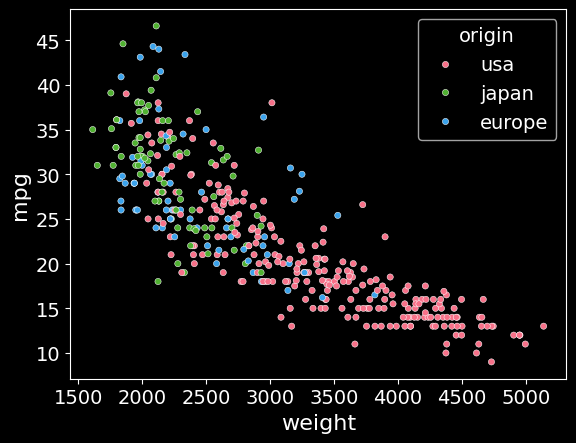

In [74]:
# mpg vs weight vs origin

sns.scatterplot(
    data=df,
    x='weight',
    y='mpg',
    hue='origin', # Generally hue is for categorical values
    s=20,
)

plt.show()

# observ: There is more from USA than Japan and Europe
# Cars from USA weigh more than Japan + Europe
# As weight goes up, MPG goes down

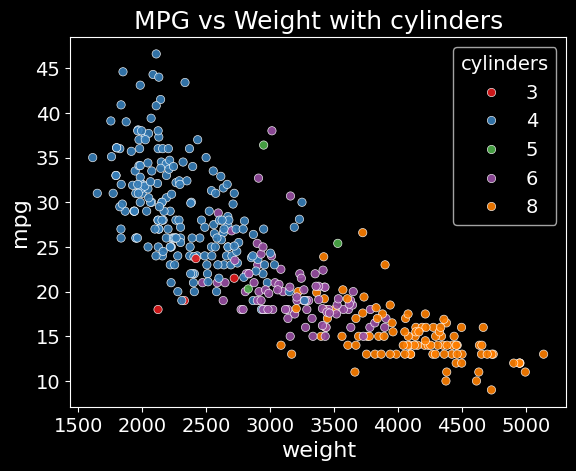

In [78]:
# MPG vs Weight vs cylinders

sns.scatterplot(
    data=df,
    x="weight",
    y="mpg",
    hue="cylinders", # Generally hue is for categorical values
    palette="Set1",
    sizes=(10, 100),
    alpha=0.9
)
plt.title("MPG vs Weight with cylinders")
plt.show()

# Observ: 
# Car with large cylinders(8), have more weight and give low MPG
# Not many 3 cylinder cars
# Cars with small cylinders(4,5) have less weight and give high MPG

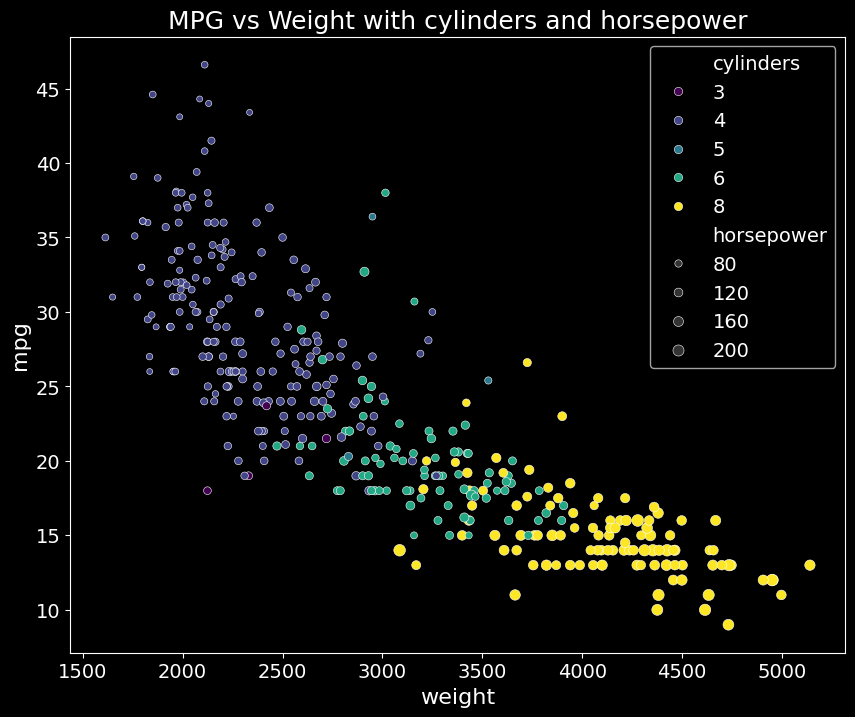

In [45]:
# MPG vs Weight vs cylinders vs horsepower

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x="weight",
    y="mpg",
    hue="cylinders", # Generally hue is for categorical values
    size="horsepower", # size indicates HP. Big cirles -> large HP
    palette="viridis",
)

plt.title("MPG vs Weight with cylinders and horsepower")
plt.show()

# Observ: 
# Big HP cars(Large Yellow circles) have high weight and low MPG and are 8 cylinders

# Pairplot: Pairwise Multivariate Relationships 

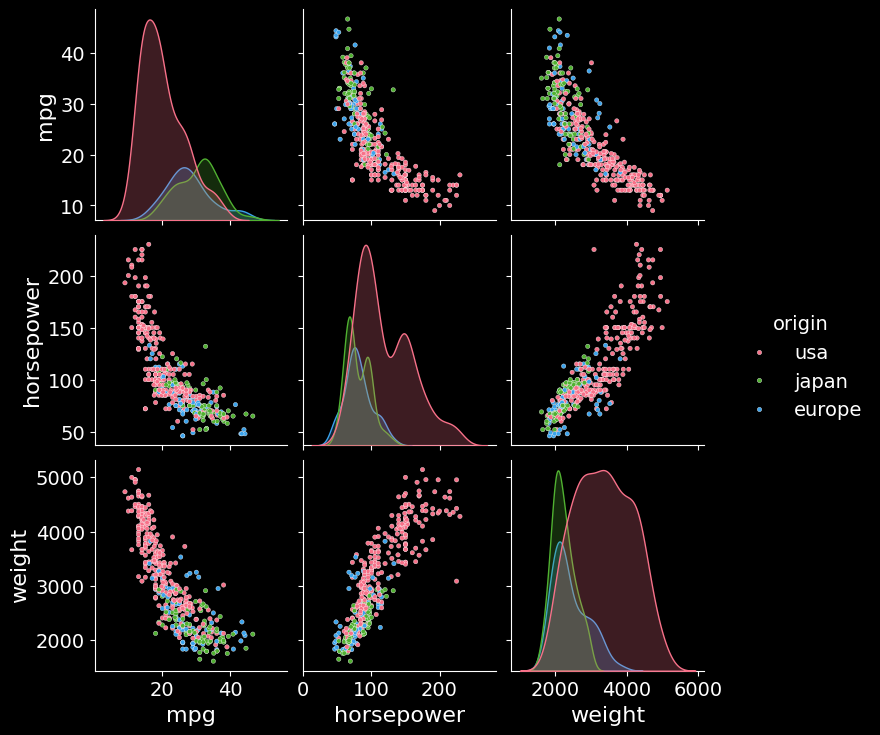

In [49]:
# NOTE: This may take 5+ secods because it is plotting 3x3=9 plots
# ["mpg", "horsepower", "weight"] vs ["mpg", "horsepower", "weight"] vs origin

sns.pairplot(
    data=df,
    vars=["mpg", "horsepower", "weight"], # keep it simple
    hue="origin",
    diag_kind="kde",
    plot_kws={"s": 10,}  # s = marker size
)
plt.show()

# Observ: MPG decreases as weight and horsepower increase
# Cars from different origins cluster differently
# Useful for feature intuition before modeling

# Boxplot: Categorical + Numerical Multivariate Analysis

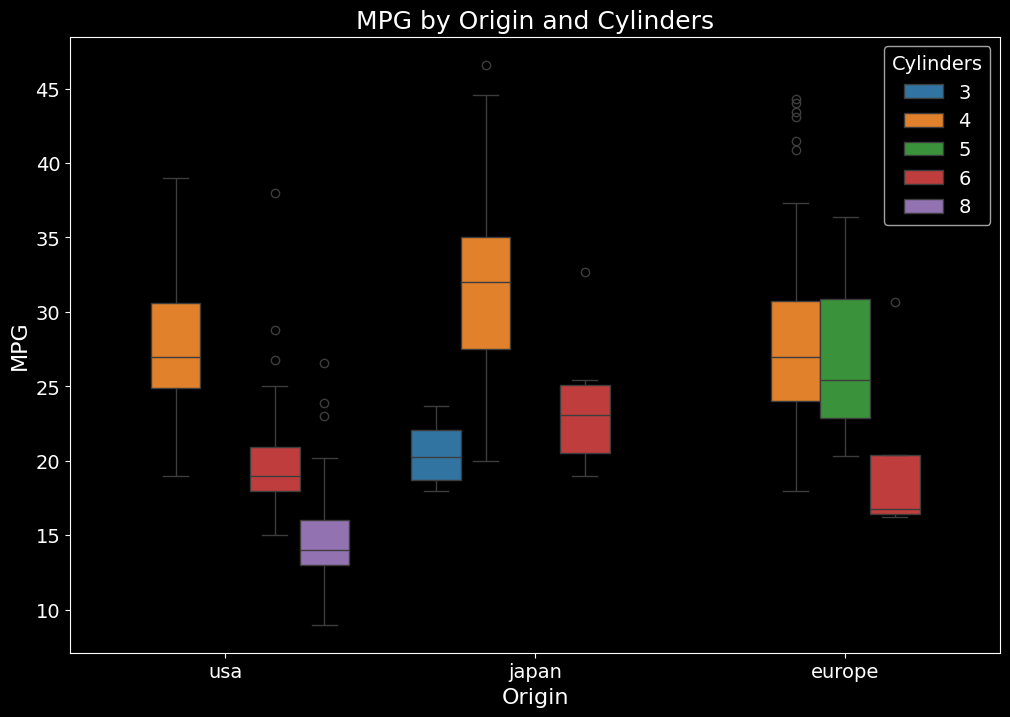

In [58]:
# TODO: Change the color to something more noticable
# MPG vs Origin vs Cylinders

# Define custom colors for each cylinder category
cylinder_palette = {
    3: "#1b9e77",   # teal
    4: "#d95f02",   # orange
    5: "#7570b3",   # purple
    6: "#e7298a",   # pink
    8: "#66a61e"    # green
}

plt.figure(figsize=(12, 8))

sns.boxplot(
    data=df,
    x="origin",
    y="mpg",
    hue="cylinders",
    palette="tab10"  #  Set1 Set2 tab10, Paired, cylinder_palette
)

plt.title("MPG by Origin and Cylinders")
plt.xlabel("Origin")
plt.ylabel("MPG")

plt.legend(title="Cylinders")
plt.show()


# observ: Fewer cylinders(4) → higher MPG
# 8 cylinder cars -> low MPG
# only Europe has 5 cylinder cars

# Heatmap: Grouped statistics for multiple categorical columns with 1 numerical column

In [79]:
# mpg vs origin vs cylinders
# 1) Group by origin and cylinders, then take mean mpg
grouped = (
    df.groupby(["origin", "cylinders"])["mpg"]
      .mean()
      .round(2)
)

print("Mean grouped value of MPG:\n", grouped)

Mean grouped value of MPG:
 origin  cylinders
europe  4            28.41
        5            27.37
        6            20.10
japan   3            20.55
        4            31.60
        6            23.88
usa     4            27.84
        6            19.66
        8            14.96
Name: mpg, dtype: float64


cylinders      3      4      5      6      8
origin                                      
europe       NaN  28.41  27.37  20.10    NaN
japan      20.55  31.60    NaN  23.88    NaN
usa          NaN  27.84    NaN  19.66  14.96
+++++++++++++++++++++


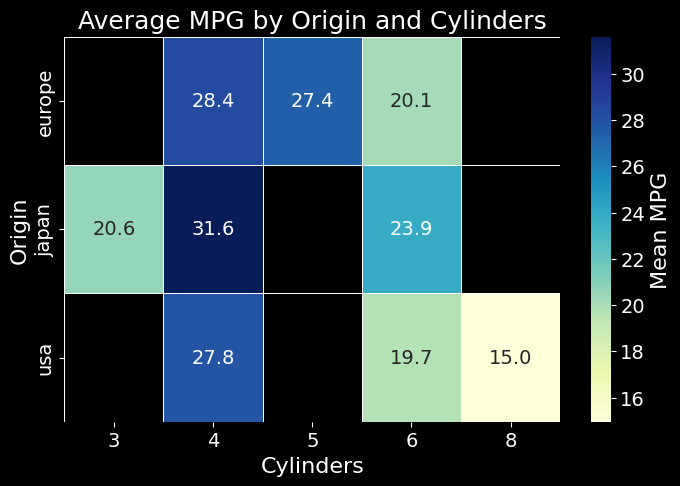

In [64]:
# 2) As table and plot

grouped = (
    df.groupby(["origin", "cylinders"])["mpg"]
      .mean()
      .round(2)
)
grouped_table = grouped.unstack()
print(grouped_table)
print("+++++++++++++++++++++")

plt.figure(figsize=(8, 5))
sns.heatmap(
    grouped_table,
    annot=True,        # show MPG values
    fmt=".1f",
    cmap="YlGnBu",     # intuitive for "higher is better"
    linewidths=0.5,
    cbar_kws={"label": "Mean MPG"}
)

plt.title("Average MPG by Origin and Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("Origin")

plt.show()

# Observation:
- 4 Cylinder cars have good MPG
- No data for 3 cylinder cars from USA

# pivot table

cylinders      3          4     5          6          8
model_year                                             
70           NaN  25.285714   NaN  20.500000  14.111111
71           NaN  27.461538   NaN  18.000000  13.428571
72          19.0  23.428571   NaN        NaN  13.615385
73          18.0  22.727273   NaN  19.000000  13.200000
74           NaN  27.800000   NaN  17.857143  14.200000
75           NaN  25.250000   NaN  17.583333  15.666667
76           NaN  26.766667   NaN  20.000000  14.666667
77          21.5  29.107143   NaN  19.500000  16.000000
78           NaN  29.576471  20.3  19.066667  19.050000
79           NaN  31.525000  25.4  22.950000  18.630000
80          23.7  34.612000  36.4  25.900000        NaN
81           NaN  32.814286   NaN  23.428571  26.600000
82           NaN  32.071429   NaN  28.333333        NaN
++++++++++++++++++


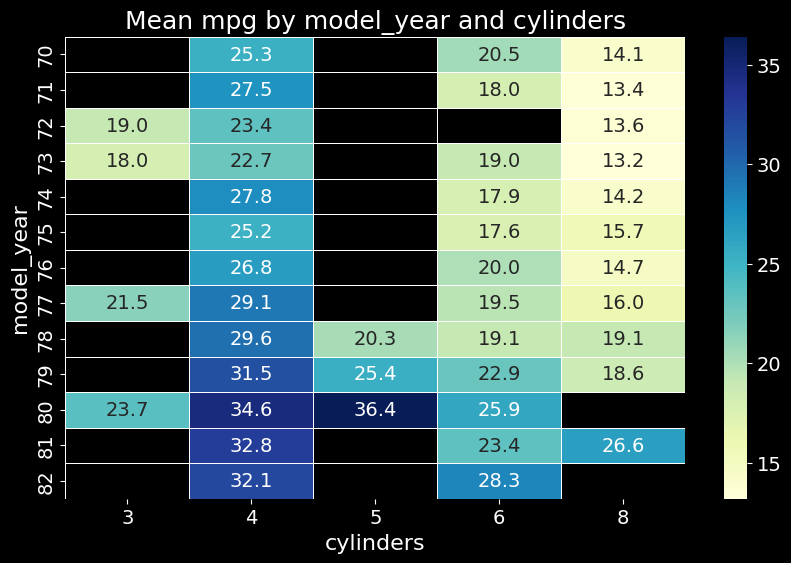

In [81]:
# model_year vs cylinders vs mean mpg
# Create pivot table: rows = model_year, columns = cylinders, values = mean mpg
idx_col = "model_year" # change to origin , model_year
col    = "cylinders"
value = "mpg"

pivot_table = df.pivot_table(values=value, index=idx_col, columns=col, aggfunc="mean")
print(pivot_table)
print("++++++++++++++++++")

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)

plt.title(f"Mean {value} by {idx_col} and {col}")
plt.xlabel(col)
plt.ylabel(idx_col)
plt.show()

# Observation: 
- 5 cyl for 1980 gave handsome mileage
- No data from 5 cyl cars for year 1970 to 1977
- 8 cyl cars mean mpg decreased from 1979 to 1970

# swarmplot

In [70]:
#1) mpg vs cylinders vs origin

idx_col = "origin" # change to origin , model_year
col     = "cylinders"
value   = "mpg"

pivot_table = df.pivot_table(values=value, index=idx_col, columns=col, aggfunc="mean")
print(pivot_table)

# Observ:
# 3 cylinders car come from japan alone
# 4 cylinders car come from japan, europe and US in equal proportion. Japanese cars have better MPG
# 5 cylinders car come from Europe alone

cylinders      3          4          5          6          8
origin                                                      
europe       NaN  28.411111  27.366667  20.100000        NaN
japan      20.55  31.595652        NaN  23.883333        NaN
usa          NaN  27.840278        NaN  19.663514  14.963107


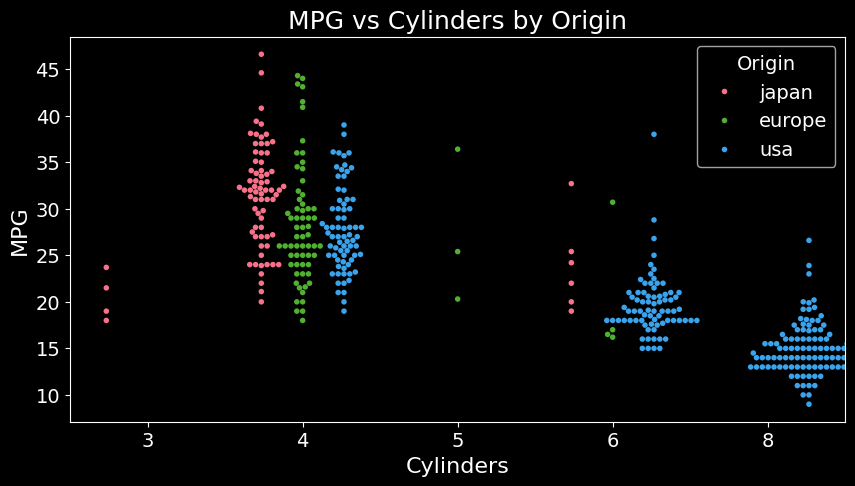

In [71]:
#2) Plot above using swarm
plt.figure(figsize=(10, 5))

sns.swarmplot(
    x="cylinders",
    y="mpg",
    hue="origin", # categorical
    data=df,
    dodge=True,
    s=4
)

plt.title("MPG vs Cylinders by Origin")
plt.xlabel("Cylinders")
plt.ylabel("MPG")

plt.legend(title="Origin")
plt.show()

# Observ:
# 3 cylinders car come from japan alone
# 4 cylinders car come from japan, europe and US in equal proportion. Japanese cars have better MPG
# 5 cylinders car come from Europe alone

## Swarmplot limitation:

Does not scale well for large datasets (>5k rows)

Can become cluttered

Use boxplot or violinplot instead